In [2]:
# import dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading data
file_to_load = "../Resources/full_titanic.csv"


no_touchy = pd.read_csv(file_to_load)
full_data = no_touchy
full_data.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0


In [4]:
# defining the dependent and independent variables 
Xtrain = full_data[['SibSp','Parch','Fare','Age_imp_median']]
ytrain = full_data['Survived']

# building the model and fitting the data
log_reg = sm.Logit(ytrain,Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.613518
         Iterations 6


0.1


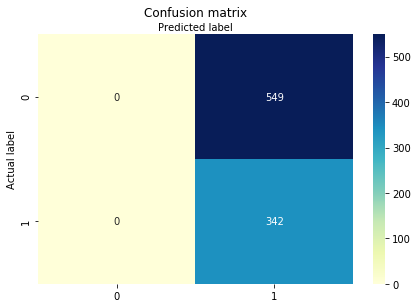

0.2


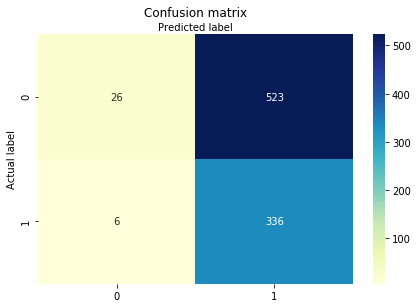

0.3


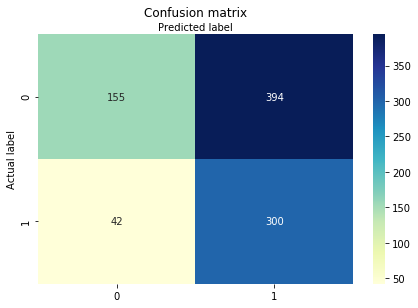

0.4


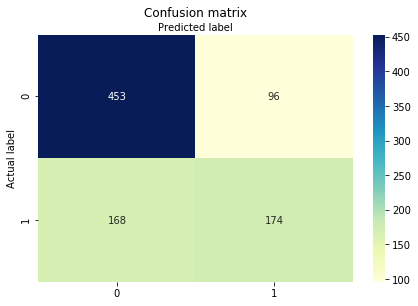

0.5


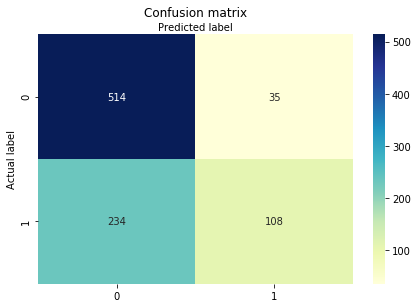

0.6


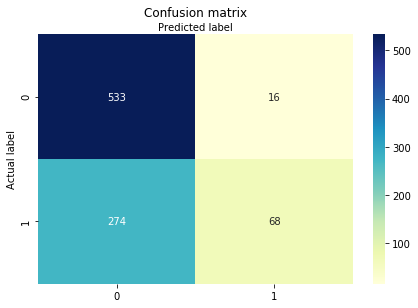

0.7


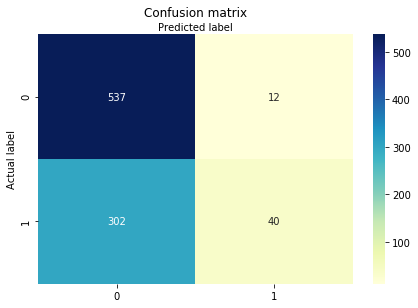

0.8


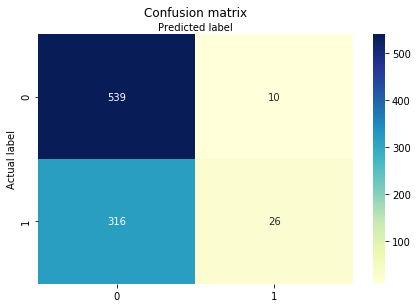

0.9


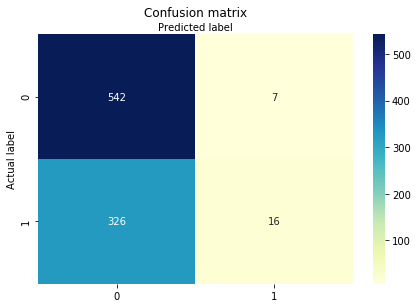

In [5]:
for threshold in range(1,10):
    threshold = round(threshold * .1,1)
    print(threshold)
    # print(log_reg.pred_table(threshold))
    log_reg.pred_table(threshold)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(log_reg.pred_table(threshold)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [42]:
print(342/(342+549))
342 +549

0.3838383838383838


891

In [32]:
# full_data['Sex_binary'] = full_data['Sex'].replace(['male'],0)
# full_data['Sex_binary'] = full_data['Sex'].replace('female',1)

full_data['Sex_binary'] = [0 if x == 'male' else 1 for x in full_data['Sex']]

full_data.head(1)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imp_median,Age_imp_mean,Sex_binary
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,22.0,22.0,0


Optimization terminated successfully.
         Current function value: 0.489084
         Iterations 6


Text(0.5, 257.44, 'Predicted label')

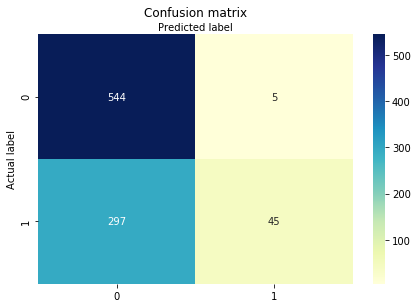

In [34]:
# defining the dependent and independent variables 
Xtrain = full_data[['SibSp','Parch','Fare','Age_imp_median','Sex_binary']]
ytrain = full_data['Survived']

# building the model and fitting the data
log_reg = sm.Logit(ytrain,Xtrain).fit()

log_reg.pred_table(threshold=.5)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(log_reg.pred_table(threshold)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
print("Accuracy:",(544+45)/(544+5+297+45))
print("Precision:",45/(50))
print("Recall:",45/(45+297))

Accuracy: 0.6610549943883277
Precision: 0.9
Recall: 0.13157894736842105


Optimization terminated successfully.
         Current function value: 0.510904
         Iterations 6


Text(0.5, 257.44, 'Predicted label')

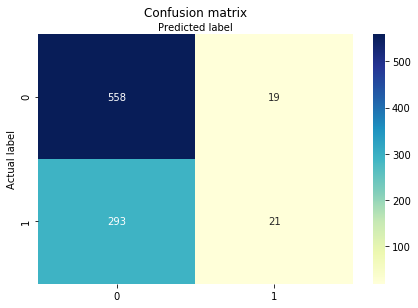

In [39]:
# defining the dependent and independent variables 
Xtrain = full_data[['SibSp','Parch','Fare','Age_imp_median','Survived']]
ytrain = full_data['Sex_binary']

# building the model and fitting the data
log_reg = sm.Logit(ytrain,Xtrain).fit()

log_reg.pred_table(threshold=.5)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(log_reg.pred_table(threshold)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [6]:
log_reg.predict()

array([0.29650147, 0.46388418, 0.34929492, 0.40259369, 0.29187862,
       0.33817925, 0.34693507, 0.35031947, 0.39945049, 0.44967699,
       0.48427841, 0.22748442, 0.39122481, 0.38718015, 0.43335633,
       0.20910854, 0.30674494, 0.3573691 , 0.28288519, 0.33305576,
       0.36543584, 0.31768183, 0.42689833, 0.45819789, 0.31103617,
       0.39472884, 0.33305576, 0.97006975, 0.33576868, 0.33583766,
       0.33898424, 0.82536428, 0.33523203, 0.14698331, 0.58763706,
       0.34923225, 0.33307314, 0.38419643, 0.29048577, 0.36521865,
       0.20497392, 0.31954324, 0.33583766, 0.62769434, 0.39753622,
       0.33647877, 0.29153293, 0.33523203, 0.24590891, 0.36609064,
       0.31720934, 0.38309504, 0.40879887, 0.32696801, 0.33679153,
       0.45819789, 0.39505139, 0.32979288, 0.55118728, 0.26770518,
       0.37363031, 0.59035046, 0.46883516, 0.38755927, 0.422496  ,
       0.30990192, 0.340069  , 0.39878228, 0.1733076 , 0.21351715,
       0.32042727, 0.23969838, 0.67866364, 0.29980631, 0.52626